<a href="https://colab.research.google.com/github/keven-silva/machine-learning-dio/blob/master/yolo_detection_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect your drive

In [1]:
%cd ..

from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [2]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [3]:
!nvidia-smi

Mon Jan  9 14:03:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

### create a folder called yolov4 and connect

In [5]:
!mkdir /mydrive/yolov4/

In [6]:
%cd /mydrive/yolov4

/content/gdrive/My Drive/yolov4


## Cloning Darknet

In [7]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.17 MiB | 6.73 MiB/s, done.
Resolving deltas: 100% (10403/10403), done.
Checking out files: 100% (2057/2057), done.


In [8]:
!mkdir /mydrive/yolov4/training

## Dataset

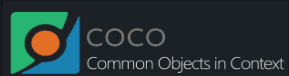

### Install CocoDataset

In [9]:
!pip install CocoDataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip annotations_trainval2014.zip

--2023-01-09 14:06:10--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.143.220, 52.217.99.180, 52.216.59.57, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.143.220|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  10.7MB/s    in 23s     

2023-01-09 14:06:33 (10.6 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]

Archive:  annotations_trainval2014.zip
  inflating: annotations/instances_train2014.json  
  inflating: annotations/instances_val2014.json  
  inflating: annotations/person_keypoints_train2014.json  
  inflating: annotations/person_keypoints_val2014.json  
  inflating: annotations/captions_train2014.json  
  inflating: annotations/captions_val2014.json  


In [11]:
!rm -r annotations_trainval2014.zip

### Person

In [12]:
from coco_dataset import coco_dataset_download as cocod

class_name = "person"
images_count = 30
annotations_path = '/content/gdrive/MyDrive/yolov4/annotations/instances_train2014.json'

cocod.coco_dataset_download(class_name, images_count, annotations_path)

loading annotations into memory...
Done (t=14.91s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
no.of image: 11
no.of image: 12
no.of image: 13
no.of image: 14
no.of image: 15
no.of image: 16
no.of image: 17
no.of image: 18
no.of image: 19
no.of image: 20
no.of image: 21
no.of image: 22
no.of image: 23
no.of image: 24
no.of image: 25
no.of image: 26
no.of image: 27
no.of image: 28
no.of image: 29
no.of image: 30
finished images download


In [13]:
!mkdir darknet/data/obj

In [14]:
!mv person/*.jpg darknet/data/obj/

In [15]:
!rm -r person

### Mouse

In [16]:
class_name = "mouse"
images_count = 50
annotations_path = '/content/gdrive/MyDrive/yolov4/annotations/instances_train2014.json'

cocod.coco_dataset_download(class_name, images_count, annotations_path)

loading annotations into memory...
Done (t=10.82s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
no.of image: 11
no.of image: 12
no.of image: 13
no.of image: 14
no.of image: 15
no.of image: 16
no.of image: 17
no.of image: 18
no.of image: 19
no.of image: 20
no.of image: 21
no.of image: 22
no.of image: 23
no.of image: 24
no.of image: 25
no.of image: 26
no.of image: 27
no.of image: 28
no.of image: 29
no.of image: 30
no.of image: 31
no.of image: 32
no.of image: 33
no.of image: 34
no.of image: 35
no.of image: 36
no.of image: 37
no.of image: 38
no.of image: 39
no.of image: 40
no.of image: 41
no.of image: 42
no.of image: 43
no.of image: 44
no.of image: 45
no.of image: 46
no.of image: 47
no.of image: 48
no.of image: 49
no.of image: 50
finished images download


In [17]:
!mv mouse/*jpg darknet/data/obj

In [18]:
!rm -r mouse

In [19]:
%cd darknet

/content/gdrive/MyDrive/yolov4/darknet


## Download weights

In [20]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-01-09 14:09:07--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  16.5MB/s    in 15s     

2023-01-09 14:09:23 (15.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## Compiling

In [21]:
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/OPENMP=0/OPENMP=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [22]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -fopenmp -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iterati

## Image visualization

In [23]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## Test weights

In [24]:
!ls

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  results
backup		darknet_images.py	libdarknet.so	       scripts
build		darknet.py		LICENSE		       src
build.ps1	darknet_video.py	Makefile	       uselib
cfg		data			net_cam_v3.sh	       vcpkg.json
cmake		image_yolov3.sh		net_cam_v4.sh	       video_yolov3.sh
CMakeLists.txt	image_yolov4.sh		obj		       video_yolov4.sh
darknet		include			README.md	       yolov3.weights


 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595

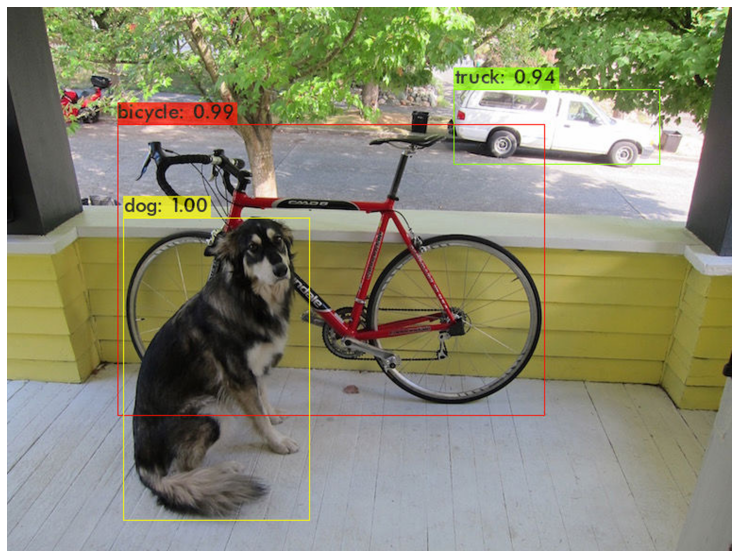

In [25]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

imShow('predictions.jpg')

## Create files

In [28]:
with open('data/obj.data', 'w') as f:
  data = ['classes=2', 'train = data/train.txt', 'valid = data/test.txt', 'names = data/obj.names', 'backup = /mydrive/yolov4/training']
  [f.write(f'{i}\n') for i in data]

In [29]:
with open('data/obj.names', 'w') as f:
  data = ["person", "mouse"]
  [f.write(f'{i}\n') for i in data] 

In [ ]:
with open('data/train.txt', 'w') as f:
  f.write('')

with open('data/test.txt', 'w') as f:
    f.write('')

## Add images path to folder obj

In [31]:
import glob, os


current_dir = 'data/obj/'

# Percentage of images to be used for the test set
percentage_test = 10;

# Create and/or truncate train.txt and test.txt
file_train = open('data/train.txt', 'w')
file_test = open('data/test.txt', 'w')

# Populate train.txt and test.txt
counter = 1
index_test = round(100 / percentage_test)
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))

    if counter == index_test:
        counter = 1
        file_test.write("data/obj" + "/" + title + '.jpg' + "\n")
    else:
        file_train.write("data/obj" + "/" + title + '.jpg' + "\n")
        counter = counter + 1

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595

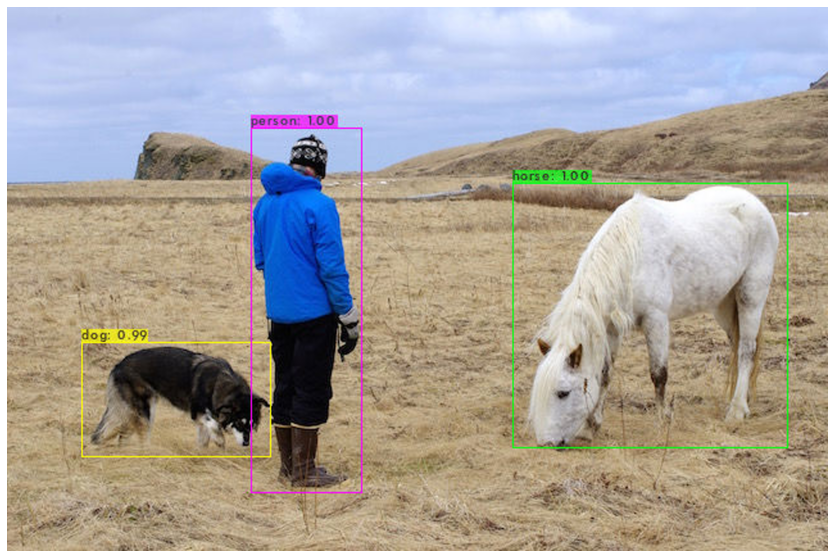

In [26]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show

imShow('predictions.jpg')

## Download Model

# Nova seção

In [27]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2023-01-09 14:13:27--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  15.9MB/s    in 11s     

2023-01-09 14:13:39 (14.3 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-tiny_3l.cfg darknet53.conv.74 -dont_show -map

A saída de streaming foi truncada nas últimas 5000 linhas.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.338005, iou_loss = 0.000000, total_loss = 0.338005 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.000000), count: 1, class_loss = 106.459450, iou_loss = 0.000000, total_loss = 106.459450 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.000000), count: 1, class_loss = 17.872414, iou_loss = 0.000000, total_loss = 17.872414 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.337996, iou_loss = 0.000000, total_loss = 0.337996 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.000000), count: 1, class_loss = 106.459427, iou_loss = 0.000000, total_loss = 106.459427 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.000000), 

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-tiny_3l.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-tiny_3l.cfg
%cd ..

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-tiny_3l.cfg /mydrive/yolov4/training/yolov3-tiny_3l_last.weights data/obj/COCO_train2014_000000040988.jpg -thresh 0.3

imShow('predictions.jpg')